# **Project - Flight Operations Analysis (Navigating Air Travel: Delays in High-Traffic Airports)**
#### **Name: Group 15: Cody Boleyn, Mubtasim Haque Talha, Bhavin Bhatt**

#####Preface: No other similar published works for linear regression found with same dataset
#####ChatGPT was referenced to help with interpreting code errors, and suggestions to correct it.

---






## **1) Objective:**

* The proposed objective of the research is to analyse the flight operations data for United States airports for the year 2019. The data provides us valuable insights into the flight operations of various airlines operating from different U.S. airports. The data consists of departing airport and the arrival airport along with various other paramaters such as distance traveled between two airports, time elapsed during the flight, delay in takeoff while departing and arrival at the destination.

* The data consists of few other parameters which describe the causes
for the delay in the flight operation such as weather delay, aircraft technical snag issues, carrier delay and delay due to security issues. With the help of the above paramaters we will calculate the total number of flights to and from an airport, the average delay in timings of a flight while departing or arriving, and find patterns with the help of supervised and unsupervised learning techniques to develop a deep understanding about causes of delays and how to curb them.

* Our stakeholders are airline companies who can get insights into causes of the delays around various airports and how they can reduce them in order to minimize the airline operations cost. The time that an aircraft spends on ground amounts to more loss. This will in-turn help airlines to reduce the turnaround time which is landing at an airport and taking off quickly so as to minimize the cost and increase profits. With the help of clustering we will find departure and arrival airports with minimal delays so that airlines can operate more flights. Finally our main aim is to make airline operations seemingly smooth and profitable so that they can increase their fleet sizes by operating more flights and the profits in-turn transfer to the customers in the form of cheap tickets.




## **2) Data Exploration**

**1.**   First, step is to import the Flight_delay.csv dataframe

**2.**   Second, we want to take a look at the shape of the data by printing the number of rows and columns

**3.**   Also, we took a look at column names, and we found the features listed below which will be the most useful to our analysis.
* DayOfWeek → 1 (Monday) - 7 (Sunday)
* UniqueCarrier → Unique carrier code
* Airline → Airline company
* ArrDelay → Difference in minutes between scheduled and actual arrival time
* Origin → Origin IATA(International Air Transport Association) airport code
* Org_Airport → Origin Airport Name
* Dest → Destination IATA code
* Dest_Airport → Destination Airport Name
* TaxiIn → Wheels down and arrival at the destination airport gate, in minutes
* TaxiOut → The time elapsed between departure from the origin airport gate and wheels off, in minutes
* CarrierDelay → Flight delay due to carrier(e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)
* WeatherDelay → Flight delay due to weather, 0 = No, yes = (in minutes)
* NASDelay → Flight delay by NSA(National Aviation System), 0 = No, yes = (in minutes)
* SecurityDelay → Flight delay by this reason, 0 = No, yes = (in minutes)
* LateAircraftDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

**4.**   Printing 10 rows of the dataframe give us a good initial look at the data and how the basics values within each feature look.








In [89]:
import pandas as pd
import numpy as np
df = pd.read_csv('Flight_delay.csv')
print("Number of rows and columns: \n", df.shape)
print("Name of columns: \n", df.columns)
df.head(10)

Number of rows and columns: 
 (484551, 29)
Name of columns: 
 Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,...,2,5,0,N,0,12,0,0,0,25
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,...,5,5,0,N,0,7,0,0,0,12
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,...,6,6,0,N,0,40,0,0,0,7
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,...,6,7,0,N,0,5,0,0,0,59
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,...,6,11,0,N,0,3,0,0,0,69



**5.**   Next, having a good summary of what the spread of numberical values looks like will help us understand how the values will eventually aggregate in later analysis.


In [90]:
df.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,752.142689,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,571.631124,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,331.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,599.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000



**6.**   Finally, we looked at the number of null values within our datframe and found that the majority the dataframe was without null values other than orgination aiport name and the destination airport name, which is not of value in this intial analysis, as we have three letter IATA code for airport designation.

In [91]:
df.isnull().sum()

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

# **3) Data Cleaning**

**1.**   The data is clean enough but we did some additional
process of adding two columns such as Total_Flights_Dep and Total_Arrival_Flights by counting the total number of occurence of Airport identifier instances in the Origin and Dest columns to count total number of flights respectively.

In [92]:
#Counting the Total Number of Flights per Airport
df['Total_Flights_Dep'] = df['Origin'].map(df.groupby('Origin')['Origin'].count())
df['Total_Flights_Arr'] = df['Dest'].map(df.groupby('Dest')['Dest'].count())
df =df.sort_values(by='Total_Flights_Dep', ascending=False)
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Flights_Dep,Total_Flights_Arr
209901,7,09-03-2019,1755,1919,1858,UA,United Air Lines Inc.,253,N504UA,144,...,0,N,0,0,0,0,0,21,46945,19250
446457,1,09-06-2019,1137,1559,1403,UA,United Air Lines Inc.,1530,N495UA,202,...,0,N,0,71,0,45,0,0,46945,8821
446455,5,06-06-2019,1056,1438,1403,UA,United Air Lines Inc.,1530,N492UA,162,...,0,N,0,30,0,5,0,0,46945,8821
446454,4,05-06-2019,1129,1448,1403,UA,United Air Lines Inc.,1530,N484UA,139,...,0,N,0,0,0,0,0,45,46945,8821
163947,7,03-02-2019,1805,2105,2020,AA,American Airlines Inc.,1339,N4YHAA,300,...,0,N,0,0,0,35,0,10,46945,7988


# **4) Adaptation**

**1.**   We created a column known as Average Departure delay per flight departing from an airport by diving the total delay minutes to the total number of flights for the departing(Origin) airport.




In [93]:
df1 = df[['Origin','DepDelay']]
df2 = df[['Origin','Total_Flights_Dep']]

df1 = df1.groupby('Origin')['DepDelay'].sum()

df_AvgDelaytime_Dep = df2.merge(df1, on='Origin', how='inner')

df_AvgDelaytime_Dep = df_AvgDelaytime_Dep.drop_duplicates(subset=['Origin'])
df_AvgDelaytime_Dep.head()

df_AvgDelaytime_Dep['Avg_Dep_delay_per_flight'] = df_AvgDelaytime_Dep['DepDelay'] / df_AvgDelaytime_Dep['Total_Flights_Dep']
df_AvgDelaytime_Dep = df_AvgDelaytime_Dep.sort_values(by='Total_Flights_Dep', ascending=False)
df_AvgDelaytime_Dep.head()

,Origin,Total_Flights_Dep,DepDelay,Avg_Dep_delay_per_flight
0,ORD,46945,2954143,62.927745
46945,DFW,33027,1713182,51.872165
79972,ATL,28834,1541421,53.458452
108806,DEN,23543,1181672,50.192074
132349,LAX,17194,937190,54.506805


**2.**   We created a column known as Average Arrival delay per flight at Arrival airports by diving the total delay in minutes for Arrival airports to the total number of flights for the Arriving(Dest) airport.




In [94]:
df3 = df[['Dest','ArrDelay']]
df4 = df[['Dest','Total_Flights_Arr']]
df3 = df3.groupby('Dest')['ArrDelay'].sum()

In [95]:
df_AvgDelaytime_Arr = df4.merge(df3, on='Dest', how='inner')
df_AvgDelaytime_Arr.head()

,Dest,Total_Flights_Arr,ArrDelay
0,DEN,19250,1090315
1,DEN,19250,1090315
2,DEN,19250,1090315
3,DEN,19250,1090315
4,DEN,19250,1090315


In [96]:
df_AvgDelaytime_Arr = df_AvgDelaytime_Arr.drop_duplicates(subset=['Dest'])

df_AvgDelaytime_Arr.head()

,Dest,Total_Flights_Arr,ArrDelay
0,DEN,19250,1090315
19250,MCO,8821,525991
28071,SAN,7988,404469
36059,TPA,5583,324022
41642,MIA,6220,410601


In [97]:
df_AvgDelaytime_Arr['Avg_Arr_delay_per_flight'] = df_AvgDelaytime_Arr['ArrDelay'] / df_AvgDelaytime_Arr['Total_Flights_Arr']
df_AvgDelaytime_Arr = df_AvgDelaytime_Arr.sort_values(by='Total_Flights_Arr', ascending=False)
df_AvgDelaytime_Arr.head()

,Dest,Total_Flights_Arr,ArrDelay,Avg_Arr_delay_per_flight
398566,ORD,40622,3310930,81.505834
144765,DFW,24543,1584993,64.580247
287425,ATL,23557,1576266,66.912850
0,DEN,19250,1090315,56.639740
177197,LAX,18350,1051460,57.300272


**3.**   Renaming Dest column in Arrival dataframe so that we can combine it with Departure airport dataframe on Origin column:


In [98]:
df_AvgDelaytime_Arr_1 = df_AvgDelaytime_Arr.rename(columns={'Dest': 'Origin'})

**4.**   This is our final dataframe that which consists of flight count for Departing and Arriving from an airport for 2019 alongwith the Flight time delays arriving and departing from an airport.




In [99]:
#Merging Dataframes
df_final = df_AvgDelaytime_Dep.merge(df_AvgDelaytime_Arr_1, on='Origin', how='inner')

df_final.head(20)

,Origin,Total_Flights_Dep,DepDelay,Avg_Dep_delay_per_flight,Total_Flights_Arr,ArrDelay,Avg_Arr_delay_per_flight
0,ORD,46945,2954143,62.927745,40622,3310930,81.505834
1,DFW,33027,1713182,51.872165,24543,1584993,64.580247
2,ATL,28834,1541421,53.458452,23557,1576266,66.912850
3,DEN,23543,1181672,50.192074,19250,1090315,56.639740
4,LAX,17194,937190,54.506805,18350,1051460,57.300272
5,LAS,15529,853543,54.964454,14930,820728,54.971735
6,SFO,14825,989875,66.770658,15721,1138317,72.407417
7,PHX,13873,709214,51.121891,12517,667377,53.317648
8,MDW,9318,508840,54.608285,7062,396607,56.160719
9,MCO,9043,540261,59.743559,8821,525991,59.629407


**5.**   Below we wanted to also bring in an additional dataframe to add the number of runways available at each of the airports in our original dataframe. We then merged these to datframe to give a final dataframe to use in later analysis.




In [100]:
df_rwy = pd.read_excel('/content/Airport_Runway.xlsx')
df_rwy.head()

,Origin,Runways
0,ORD,16
1,DFW,14
2,ATL,10
3,DEN,12
4,LAX,8


In [101]:
df_final = df_final.merge(df_rwy, on='Origin', how='inner')
df_final.head()

,Origin,Total_Flights_Dep,DepDelay,Avg_Dep_delay_per_flight,Total_Flights_Arr,ArrDelay,Avg_Arr_delay_per_flight,Runways
0,ORD,46945,2954143,62.927745,40622,3310930,81.505834,16
1,DFW,33027,1713182,51.872165,24543,1584993,64.580247,14
2,ATL,28834,1541421,53.458452,23557,1576266,66.912850,10
3,DEN,23543,1181672,50.192074,19250,1090315,56.639740,12
4,LAX,17194,937190,54.506805,18350,1051460,57.300272,8


# **5) Descriptive Static Visualization**

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**1.**   The scatter plot below shows the relationship between arrival delay and departure delay. As expected, there is a positive linear relationship between them. While there are much more data points and variation for lower delay times, it seems that arrival and departure delays are closer to each other for higher delay times.




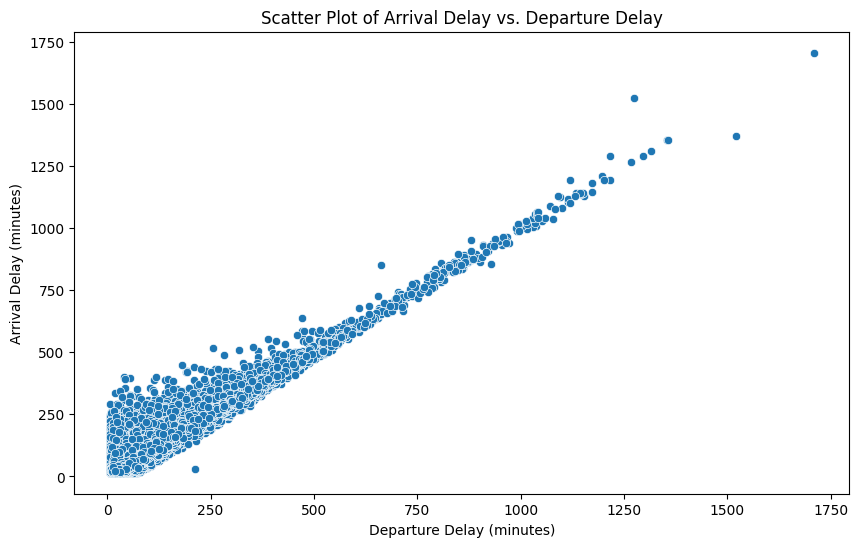

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DepDelay', y='ArrDelay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Scatter Plot of Arrival Delay vs. Departure Delay')
plt.show()

**2.**   The histogram below shows how flights are distributed according to days of the week. Thursdays and Fridays seem to be the busiest days for air traffic


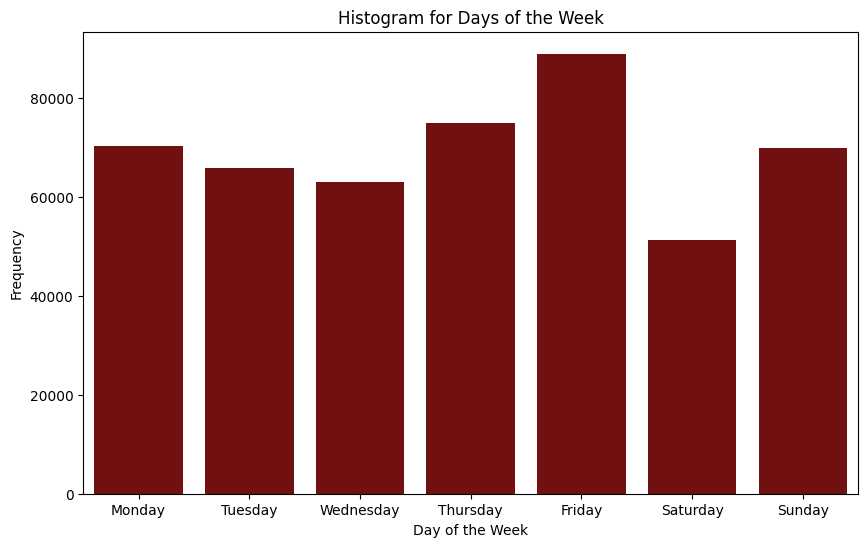

In [104]:
# Creating a dictionary to map numerical values to day names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Replacing the numerical values with day names
df['DayOfWeek'] = df['DayOfWeek'].replace(day_mapping)


# Adding order for the days so that it shows Monday-Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', color='maroon', order=day_order) #countplot() with order parameter puts the days in sequence
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('Histogram for Days of the Week')

plt.show()

**3.**   The pie chart below shows the distribution of total delay times within all the different airlines in the dataset. Southwest Airlines account for 20.6% of the total delay time in the dataset, followed by American and United Airlines.




In [105]:
# Calculating the total delay time for each airline
airline_delay_totals = df.groupby('Airline')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

# Calculating the total delay time for each airline as a new column
airline_delay_totals['TotalDelay'] = airline_delay_totals.sum(axis=1)

# Creating a pie chart
fig = px.pie(airline_delay_totals, names=airline_delay_totals.index, values='TotalDelay', title='Total Delay Times by Airline')
fig.show()



**4.**   The graph below gives us the top 40 airports with most number of flights departing and arriving from an airport. The top 5 airports are as follows:

*   ORD - Chicago O'Hare International Airport (ORD)
*   DFW - Dallas Fort Worth International Airport
*   ATL - Hartsfield-Jackson Atlanta International Airport
*   DEN - Denver International Airport
*   LAX - Los Angeles International Airport



Text(0, 0.5, 'Top Airports with Maximum Departing Flights')

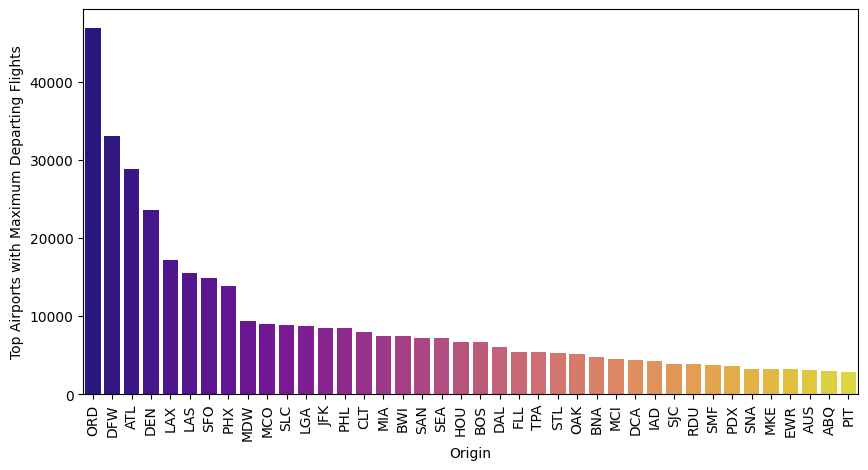

In [106]:
df_AvgDelaytime_Dep_40 = df_AvgDelaytime_Dep.head(40)

import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_AvgDelaytime_Dep_40["Origin"],y= df_AvgDelaytime_Dep_40["Total_Flights_Dep"],palette="plasma",ci=None)
plt.ylabel("Top Airports with Maximum Departing Flights")

Text(0, 0.5, 'Top Airports with Maximum Arriving Flights')

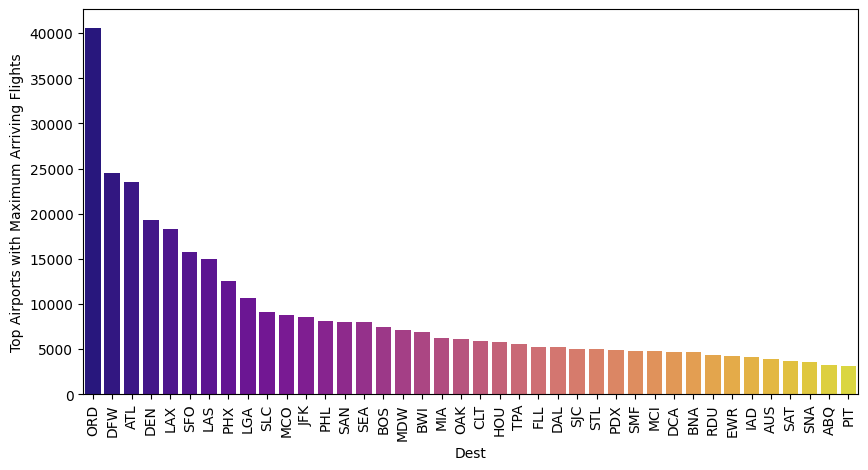

In [107]:
df_AvgDelaytime_Arr_40 = df_AvgDelaytime_Arr.head(40)

import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_AvgDelaytime_Arr_40["Dest"],y= df_AvgDelaytime_Arr_40["Total_Flights_Arr"],palette="plasma",ci=None)
plt.ylabel("Top Airports with Maximum Arriving Flights")



**5**.   The graph below shows the Average time in departure delay for a flight operating from various airports. It can be seen that the maximum delay in flights which are above 60minutes per flight can be observed at the following airports. Most of the airports in the list are in top 10 busiest airports so this might be one of the reasons for the delay in departure.
* EWR - Newark Liberty International Airport
* ORD - Chicago O'Hare International Airport
* SFO - San Francisco international Airport
* JFK - John F. Kennedy International Airport
* PHL - Philadelphia International Airport






Text(0, 0.5, 'Departure Avg Time Delays')

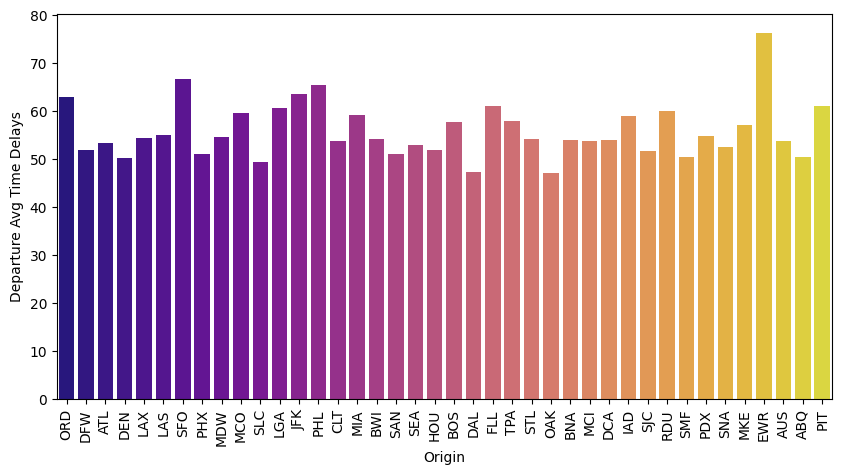

In [108]:
df_AvgDelaytime_Dep_40 = df_AvgDelaytime_Dep.head(40)

import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_AvgDelaytime_Dep_40["Origin"],y= df_AvgDelaytime_Dep_40["Avg_Dep_delay_per_flight"],palette="plasma",ci=None)
plt.ylabel("Departure Avg Time Delays")

**6.**   The average arrival time delay per flight arriving at top 40 busiest airports in more than the average departure time. The average  departure delay per flight is below 80minutes whereas the average arrival delay timings per flight is above 80 for a few airports namely
* ORD - Chicago O'Harei Internation Airport
* EWR - EWR - Newark Liberty International Airport which also had the highest departure time.
* SFO - San Francisco international Airport
* JFK - John F. Kennedy International Airport


Text(0, 0.5, 'Arrival Avg Time Delays')

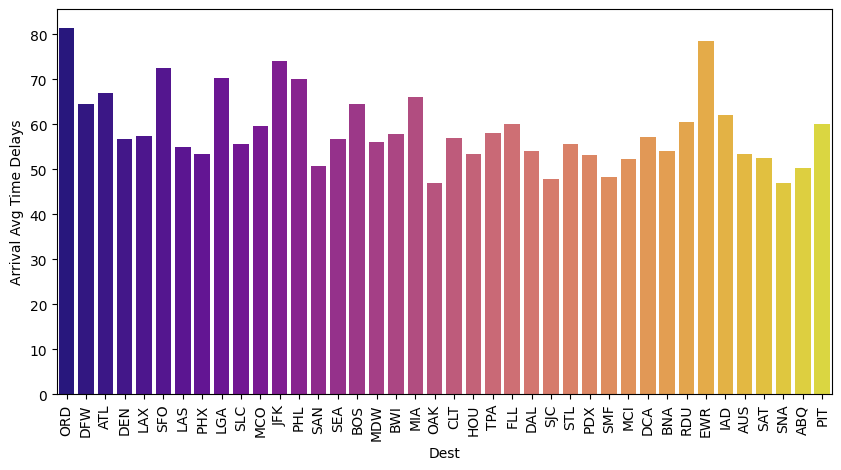

In [109]:
df_AvgDelaytime_Arr_40 = df_AvgDelaytime_Arr.head(40)

import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x= df_AvgDelaytime_Arr_40["Dest"],y= df_AvgDelaytime_Arr_40["Avg_Arr_delay_per_flight"],palette="plasma",ci=None)
plt.ylabel("Arrival Avg Time Delays")

# **7) Dendograms**

**1.**   Below we wanted to build a dendogram to understand the relationship between different airport and their taxi in and taxi out times. These values contribute to the overall delay time for each flight


*   The TaxiIn Dendogram shows three distict clusters of airports. The orange cluster seems to indicate that those three airport have very distinct and common taxi in delays, while both blue and green cluster are more tightly grouped together based on their groups taxi in delays
*   The TaxiOut Dendogram show a blue cluster that encompasses almost all the origins. Within the blue cluster, there is a green cluster and these origins seem to have more similarity but still vary within themselves.The orange cluster suggests that these airports have relatively similar delays amongst themselves and AAD is standalone.






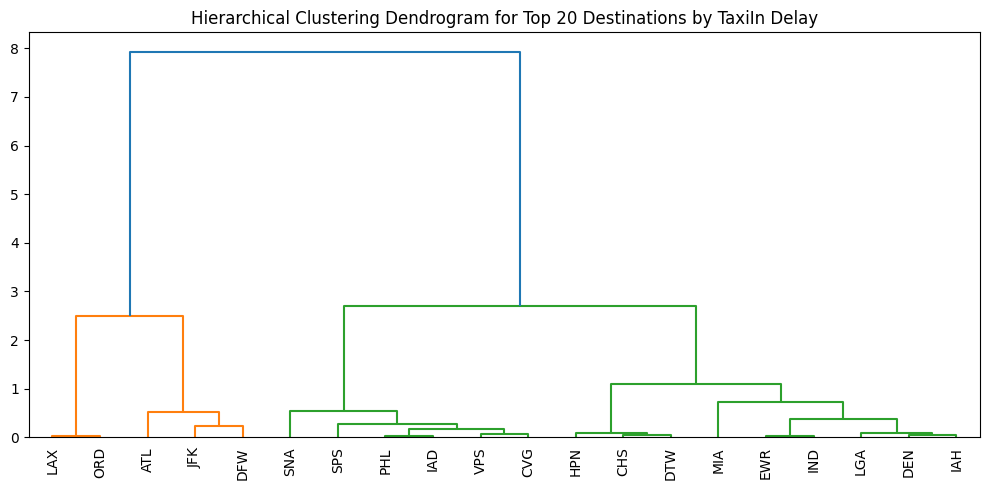

In [126]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

agg_by_origin = df.groupby('Dest').agg({
    'TaxiIn': 'mean'
}).reset_index()


agg_by_origin = agg_by_origin.sort_values(by='TaxiIn', ascending=False).head(20)

Z = linkage(agg_by_origin.iloc[:, 1:], method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram for Top 20 Destinations by TaxiIn Delay')
dendrogram(Z, labels=agg_by_origin['Dest'].tolist())
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.show()

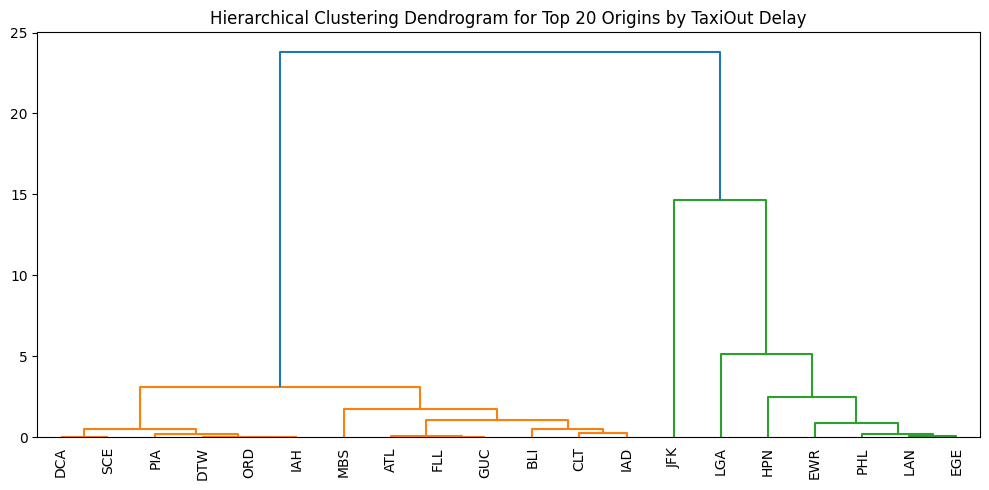

In [111]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

agg_by_origin = df.groupby('Origin').agg({
    'TaxiOut': 'mean'
}).reset_index()

agg_by_origin = agg_by_origin.sort_values(by='TaxiOut', ascending=False).head(20)

Z = linkage(agg_by_origin.iloc[:, 1:], method='ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram for Top 20 Origins by TaxiOut Delay')
dendrogram(Z, labels=agg_by_origin['Origin'].tolist())
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()
plt.show()

# **9) Sklearn.Cluster**

**1.**   Below we used the kMeans functions for sklearn to divide our data into 5 clusters, which were derived from elbow graph. The data of arrival delay and departure is used to divide all data points of each airport into clusters. We also created a function which allows us to input average arrival and departure delays in order to display relevant clusters.




In [112]:
df_final = df_final.sort_values(by='Avg_Dep_delay_per_flight', ascending=False)

df_final = df_final[df_final['Origin'] != 'ACY']

df_final = df_final.sort_values(by='Avg_Arr_delay_per_flight', ascending=False)

df_final = df_final[df_final['Origin'] != 'MQT']

df_final.head()

,Origin,Total_Flights_Dep,DepDelay,Avg_Dep_delay_per_flight,Total_Flights_Arr,ArrDelay,Avg_Arr_delay_per_flight,Runways
0,ORD,46945,2954143,62.927745,40622,3310930,81.505834,16
36,EWR,3197,244271,76.406318,4264,334339,78.409709,6
158,CRW,205,15425,75.243902,266,20182,75.872180,2
230,MCN,67,4539,67.746269,99,7481,75.565657,4
243,YAK,56,4170,74.464286,77,5774,74.987013,4


In [113]:
df_cluster = df_final[['Avg_Dep_delay_per_flight', 'Avg_Arr_delay_per_flight']]

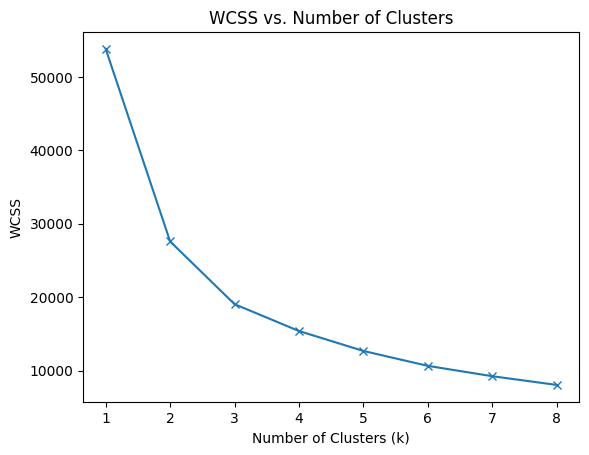

In [114]:
import warnings
warnings.filterwarnings("ignore")

WCSS = []  # To store the WCSS values
k_values = [1, 2, 3, 4, 5, 6, 7, 8]

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_cluster)
    WCSS.append(kmeans.inertia_)

# Plot the WCSS values for different k
plt.plot(k_values, WCSS, marker='x')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.show()


In [115]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram

model = KMeans(n_clusters=5)
model.fit(df_cluster)

KMeans(n_clusters=5)

Text(0, 0.5, 'Average Arrival Flight')

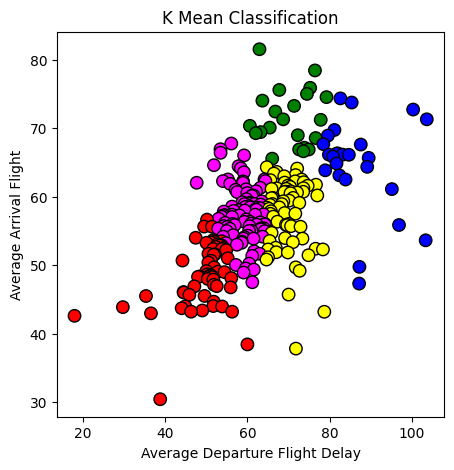

In [116]:
fig = plt.figure(figsize=(5, 5))

colormap = np.array(['yellow', 'red', 'blue', 'magenta', 'green'])

plt.scatter(df_cluster['Avg_Dep_delay_per_flight'], df_cluster['Avg_Arr_delay_per_flight'], c = colormap[model.labels_], edgecolor = 'black', s=80)
plt.title('K Mean Classification')
plt.xlabel('Average Departure Flight Delay')
plt.ylabel('Average Arrival Flight Delay')


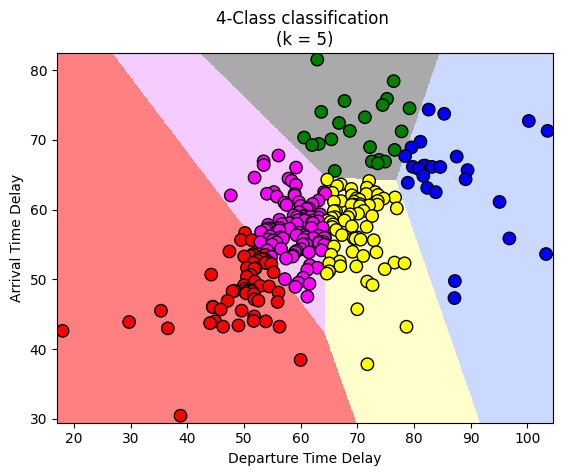

In [127]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff','#aaaaaa'])
    colormap = np.array(['yellow', 'red', 'blue', 'magenta', 'green'])

    x_min, x_max = df_cluster.Avg_Dep_delay_per_flight.min() - 1, df_cluster.Avg_Dep_delay_per_flight.max() + 1
    y_min, y_max = df_cluster.Avg_Arr_delay_per_flight.min() - 1, df_cluster.Avg_Arr_delay_per_flight.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(df_cluster['Avg_Dep_delay_per_flight'], df_cluster['Avg_Arr_delay_per_flight'], c = colormap[model.labels_], edgecolor = 'black', s=80)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("4-Class classification \n(k = %i)" % (5))
    plt.xlabel('Departure Time Delay')
    plt.ylabel('Arrival Time Delay')
plotMesh()

In [118]:
colormap = np.array(['yellow', 'red', 'blue', 'magenta', 'green'])

Avg_Dep_delay_per_flight = float(input('Avg Delay time: '))
Avg_Arr_delay_per_flight = float(input('Avg Arrival time): '))
data_class = model.predict(np.array([Avg_Dep_delay_per_flight, Avg_Arr_delay_per_flight]).reshape(1, -1))[0]
Result = colormap[data_class]
print(Result)

Avg Delay time: 14
Avg Arrival time): 45
red


# **10) kNN Algorithm**

**1.**   Below we ran a basic kNN algorithm prediction model to classify delays based on their distance to existing data to predict the number of runways. To build a classifier, we first needed to devide the number of runways by two for use in the kNN model. We then printed 5 example delay times to predict the classifiers for runways associated with those times.




In [119]:
df_final['Classifier'] = df_final['Runways']/2
df_final['Classifier'] = df_final['Classifier'].astype(int)


In [120]:
df_cluster_2 = df_final[['Avg_Dep_delay_per_flight', 'Avg_Arr_delay_per_flight', 'Classifier']]

In [121]:
from collections import Counter
from scipy.spatial import distance

def predictKNN(k, data_point, df_cluster_2):
    data_point = pd.Series(data_point)

    df_cluster_2['distance'] = df_cluster_2.iloc[:, :-1].apply(lambda row: distance.euclidean(row, data_point), axis=1)

    k_nearest = df_cluster_2.nsmallest(k, 'distance')

    most_common = Counter(k_nearest['Classifier']).most_common(1)[0][0]

    df_cluster_2.drop('distance', axis=1, inplace=True)

    return most_common



In [122]:
data_point_example = [87, 99]
result = predictKNN(4, data_point_example, df_cluster_2.copy())
print("Predicted Class_1:", result)

data_point_example = [30 ,33]
result = predictKNN(4, data_point_example, df_cluster_2.copy())
print("Predicted Class_2:", result)

data_point_example = [54 ,66]
result = predictKNN(4, data_point_example, df_cluster_2.copy())
print("Predicted Class_3:", result)

data_point_example = [103,144]
result = predictKNN(4, data_point_example, df_cluster_2.copy())
print("Predicted Class_4:", result)

data_point_example = [62 ,81]
result = predictKNN(4, data_point_example, df_cluster_2.copy())
print("Predicted Class_5:", result)


Predicted Class_1: 3
Predicted Class_2: 2
Predicted Class_3: 1
Predicted Class_4: 3
Predicted Class_5: 4


# **11) Project Report**


* We started this analysis to further understand what are the most significant contributors to flight delays. We found several interesting aspects within the data, that give clear insights into what factors and trends affect delay, and we have summerized those below

* We first found that Southwest Airlines, American Airlines, and United Airlines account for the highest proportion of total delay time, as shown in a pie chart. This should be something that is taken into consideration if your airline is looking to partner with other airlines for connecting flights, as the airlines above may be more likely to affects the overall delay booked with your airline.

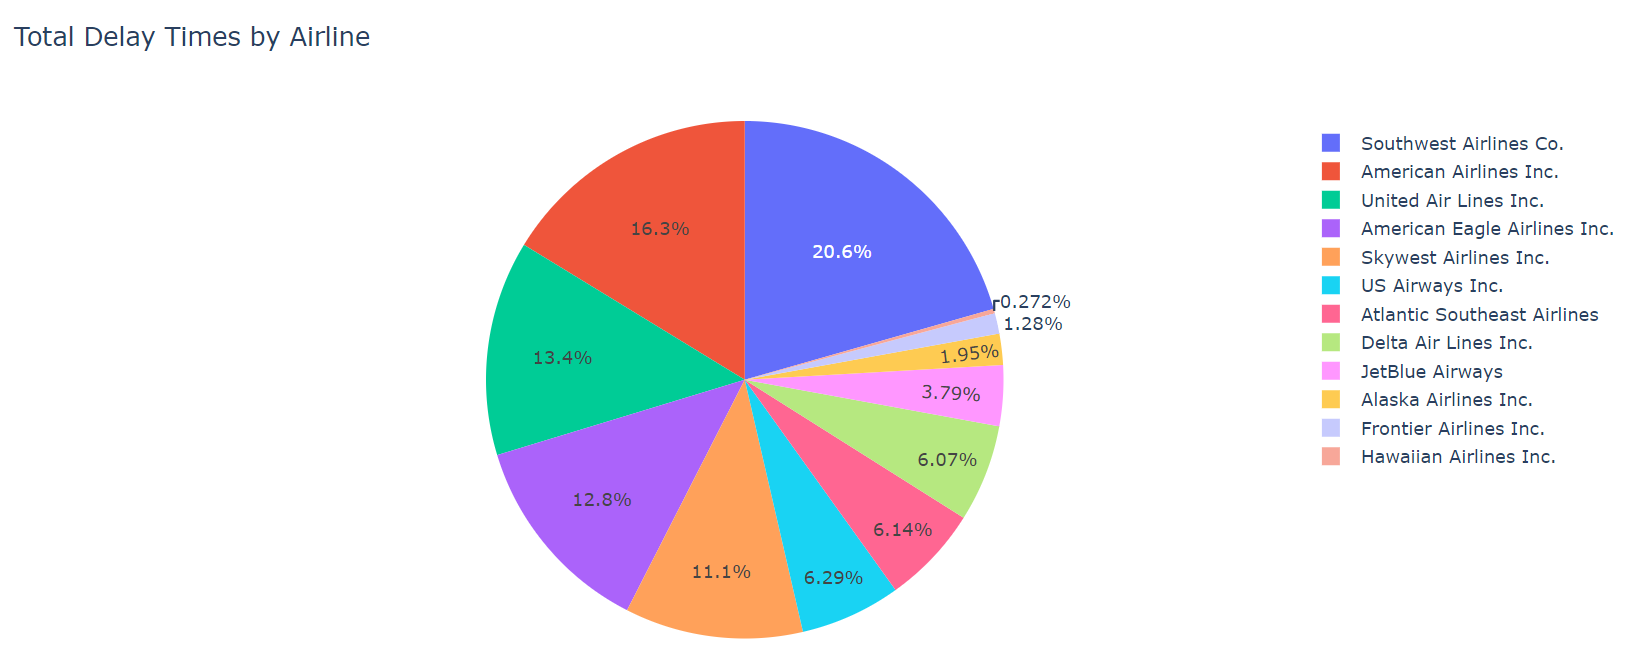



* The top 5 busiest airports in terms of the number of flights are Chicago O'Hare International Airport (ORD), Dallas Fort Worth International Airport (DFW), Hartsfield-Jackson Atlanta International Airport (ATL), Denver International Airport (DEN), and Los Angeles International Airport (LAX). These airports are the main hubs for both domestic and internations flights, and many of the connections made between continuing flights are routed through these airports.

* Surpringingly, only ORD of the 5 most busy airports is included in the top 5  airports with the highest departure delay . These airports include Newark Liberty International Airport (EWR), Chicago O'Hare International Airport (ORD), San Francisco International Airport (SFO), John F. Kennedy International Airport (JFK), and Philadelphia International Airport (PHL). Arrival delays are usually most impacted by taxi in delays.

* This is also true of the the top 5 airports with the highest arrival delay, which include Chicago O'Hare International Airport (ORD), Newark Liberty International Airport (EWR), San Francisco International Airport (SFO), and John F. Kennedy International Airport (JFK). ORD, one of the top 5 busiest airports, which is also found to be in the 5 aiports with the highest departure and arrival delays.



* After understanding that ORD is one of the busiest airport by number of flights, along with the leading in delays. It became very clear that any airline that is looking to reduce its delays, should reconsider routing their flights through ORD. This is further illustrated in the article below:
https://www.nbcnews.com/business/travel/new-ohare-runway-start-easing-delays-chicago-airport-flna8c11413283




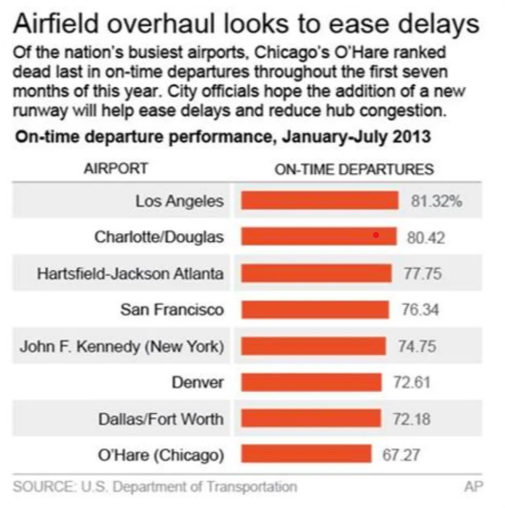

* We then grouped airports into two seperate dendograms. One depecting the top 20 airports with the highest taxi in delays, and one with the highest taxi out delays. Interestingly, there does not seem to be any significant correlation to overall delays in our worst performers listed above.

* The K means function shows us clear cluster that you can use to determine which group of airports with similiar delays you may want to use or avoid. Those that have the average delay and arrival times within those similar clusters tend expected over delay. If airline decides to include a new airport into is route planning, then they can input the average delay times into the function created and the result will give them cluster for the associated airports.

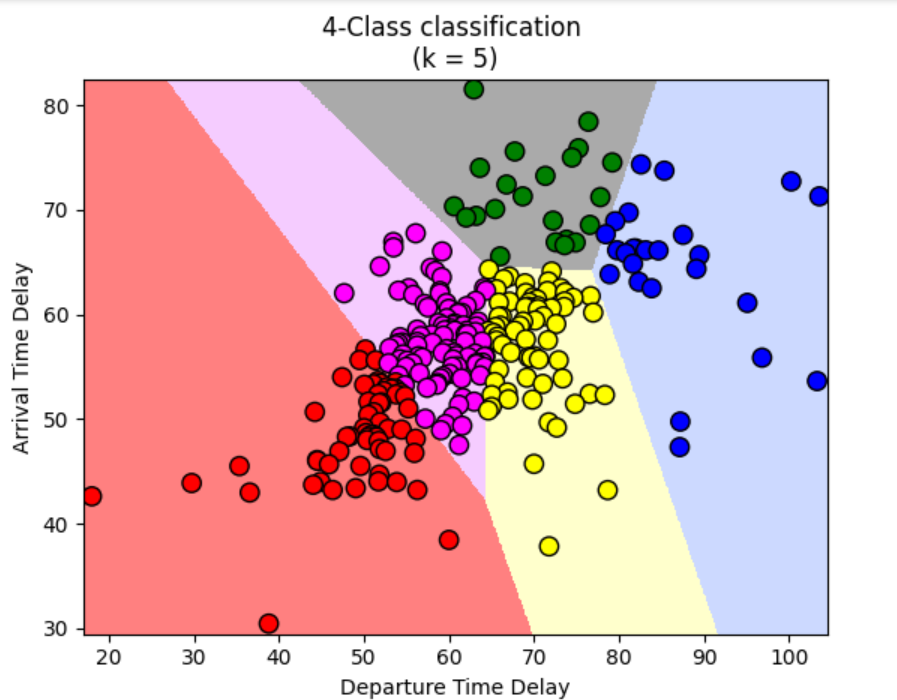

 * The busiest airports don't tend to fall in the top delay contributors, but they do have considerable delay times as well. This may be something to consider when promoting flights through these busier airports, and may also be something to factor when planning your flights and connections.

* This analysis helps you to understand what are the major airports causing the delay in the flight operations. If you want to make the decision of increasing the frequency of the flights between two airports with major delays, then we suggest you weigh in the cost factor associated with that delay. Ulitimately the more time spent on the ground not only costs the airline fuel, maintenace, and labor costs, but it also impacts your customer relations.
